In [1]:
import datetime
from datetime import datetime
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

In [2]:
from hmmlearn.hmm import GaussianHMM

In [3]:
from matplotlib import cm, pyplot as plt
from matplotlib.dates import HourLocator, MinuteLocator, DayLocator, AutoDateLocator, WeekdayLocator, DateFormatter

In [4]:
from sklearn.metrics import accuracy_score 

In [5]:
one_tick=pd.read_csv('total_data1T.csv', sep=' ')

In [6]:
dict_by_code=dict(list(one_tick.groupby('code')))

In [7]:
for key in dict_by_code.keys():
    if key==660: #insert stock code
        one_tick=dict_by_code[key]

In [8]:
ts=pd.to_datetime(one_tick['date'])

In [9]:
# ts = Series(one_tick.date)
dates = np.array(ts.values)
now_value = np.array(one_tick['now'])
volume = np.array(one_tick['volume'], dtype=int)

In [10]:
#for training
diff = np.diff(now_value[:-100])
dates = dates[1:-100]
now_value = now_value[1:-100]
volume = volume[1:-100]

In [11]:
#for prediction
eval_diff = np.diff(now_value[-101:])
eval_dates = dates[-100:]
eval_now_value = now_value[-100:]
eval_volume = volume[-100:]

In [12]:
X = np.column_stack([diff, volume])

In [13]:
model = GaussianHMM(n_components=5, covariance_type="diag", n_iter=1000).fit(X)

In [14]:
hidden_states = model.predict(X)

C:\Users\KyeoRae\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you real

Transition matrix
[[3.18194169e-01 2.69377500e-02 5.08364917e-01 8.28601532e-02
  6.36430108e-02]
 [6.00271372e-02 8.26388584e-01 4.45068519e-02 1.12386641e-30
  6.90774265e-02]
 [1.91802260e-01 3.60445877e-01 2.49067834e-01 7.56807090e-03
  1.91115958e-01]
 [4.03972159e-01 6.22239574e-14 1.45054775e-01 4.50973066e-01
  3.00890812e-25]
 [1.27988597e-01 7.11508266e-02 1.46863135e-02 3.13509472e-02
  7.54823316e-01]]

Means and vars of each hidden state
0th hidden state
mean =  [-7.81127039e-01  1.80771017e+04]
var =  [2.51937594e+03 8.62235601e+07]

1th hidden state
mean =  [7.43655065e-02 2.23698044e+03]
var =  [1.98453885e+02 9.57588926e+05]

2th hidden state
mean =  [-3.68641501e+00  5.26388462e+03]
var =  [2.64916237e+03 8.98805851e+06]

3th hidden state
mean =  [2.97154404e+01 5.28726349e+04]
var =  [3.59988109e+04 1.82445388e+09]

4th hidden state
mean =  [1.98777895e-02 4.67677069e+03]
var =  [6.32525554e+01 8.82352903e+06]



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

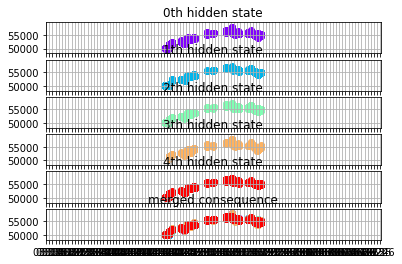

In [15]:
print("Transition matrix")
print(model.transmat_)
print()

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    model.predict_proba
    print("var = ", np.diag(model.covars_[i]))
    print()

fig, axs = plt.subplots(model.n_components+1, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.scatter(dates[mask], now_value[mask], c=colour)
    ax.set_title("{0}th hidden state".format(i))
    
    plt.scatter(dates[mask], now_value[mask], c=colour)
    plt.title('merged consequence')
    plt.grid(True)
    
    # Format the ticks.
    ax.xaxis.set_major_locator(DayLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%m.%d'))
    ax.grid(True)   
    
plt.rcParams["figure.figsize"]=(30,20)
plt.show()

In [16]:
data_vec = np.column_stack([eval_diff, eval_volume])

In [17]:
state_prob=model.predict_proba(data_vec)

In [18]:
state_predict = model.predict(data_vec)

In [19]:
predict=state_prob*100

In [20]:
# predict.astype(int) #설명력

In [21]:
real_updown =Series(eval_diff).map(lambda x : 1 if x>0 else 0)

In [22]:
predict_updown = Series(state_predict).map(lambda x : 1 if x in [0, 1, 4] else 0)

In [23]:
prob = accuracy_score(real_updown,predict_updown)

In [24]:
prob

0.55